<a href="https://colab.research.google.com/github/jmdelvecchio/ears33/blob/main/Martian_valley_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Tutorial Term Project**

**Motivation:** This data tutorial focuses on the role that valley networks versus paleolake outlet canyons in valley formation on Mars. Specifically, this tutorial focuses on the differences in depths between normal valley network rivers and the depths of the outlet canyons. In the study by Goudge et al., they show that there is a length–volume discrepancy where the canyons only make up 3% of overall valley length; however, they are responsible for about a quarter of all erosion during the valley network formation era. What might explain the differences in valley networks and canyons? The incision depth. <br>

**Geomorphic concept:** Canyons, which eroded a quarter of sediment on Mars during the valley formation era, incised significantly deeper than nearby rivers. What impact might the existence of these deep canyons have on the continued formation and other aspects of the landscape?

In this tutorial we will be using data from Goudge et al. 2021) which can be downloaded here: https://dataverse.tdl.org/dataset.xhtml?persistentId=doi:10.18738/T8/STRFZH <br>

In this tutorial we will use rasterio to load and open the .tif files that hold the valley and palelake canyon depths. 

**Connection to course material:** This data tutorial relates to sectino of the class where we learned about fluvial processes, specifically the role of erosion and incision. From class we know that hillslopes are influenced by diffusion, erosion and uplift from the following equation: ____. In this paper we are focusing on how erosion impacts valley formation/hillslopes.

**Data Generation:** Go to the above link, download the files and then you'll need to upload Goudge_et_al_2021_Nature_PBTH_Output_Paleolake_Outlet_Canyon_Depth_m.tif and Goudge_et_al_2021_Nature_PBTH_Output_Valley_Network_Depth_m.tif to your Google Colab folder and then this code should run for you. *Note on the data: I this analysis without masking the data as Google Colab kept crashing, but even without masking the data as they did in the paper we get very similar results. Also, they had tried multiple different masks to get different output numbers.

In [ ]:
!pip install geopandas --quiet
!pip install rasterio --quiet

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import geopandas as gpd
import numpy as np
import rasterio


# Part One - just give me the data from the rasters please

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Open the valley network tif file
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/gavenhannah_130976_9661100_Goudge_et_al_2021_Nature_PBTH_Output_Valley_Network_Depth_m.tif') as src:
  print(src.nodata)
  # the "nodata" value for this raster is 32767, so in case you don't mask your data with the mask call you will know why you have so many of that value!
  data_valley = src.read(1, masked=True)
  # This reads the first "band" of the rasterio format which is where all the data is, and it will mask out the nodatas. 

32767.0


In [ ]:
# What is the mean depth of the valleys?
print("mean")
np.mean(data_valley)

mean


83.97261530597191

In [ ]:
# What is the median depths of the valleys 

valley = data_valley.compressed() # compress so we can manipulate without crashing google colab
print("median: " + str(np.median(valley)))
print("Q1: " + str(np.percentile(valley, 25)))
print("Q3: " + str(np.percentile(valley, 75)))

# These output values are super similar to the median values given in the paper 
# for the depths of the valleys (median = 77.5 m, Q1 = 47.5 m, Q3 = 97.5 m)

median: 72.0
Q1: 42.0
Q3: 107.0


In [ ]:
# Open the output canyon tif file

with rasterio.open('/content/drive/MyDrive/submissions (1)/gavenhannah_130976_9661102_Goudge_et_al_2021_Nature_PBTH_Output_Paleolake_Outlet_Canyon_Depth_m.tif') as src2:
  print(src2.nodata)
  # the "nodata" value for this raster is 32767, so in case you don't mask your data with the mask call you will know why you have so many of that value!
  data_canyons = src2.read(1, masked=True)
  # This reads the first "band" of the rasterio format which is where all the data is, and it will mask out the nodatas.

32767.0


In [ ]:
# Mean depth of output canyons
data_canyons
np.mean(data_canyons)

292.3307415667129

In [ ]:
# Median and inter-quartile ranges of the outlet canyons
canyon = data_canyons.compressed() #compress to keep google colab from crashing
print("median: " + str(np.median(canyon)))
print("Q1: " + str(np.percentile(canyon, 25)))
print("Q3: " + str(np.percentile(canyon, 75)))

# Goudge et al. state that the outlet canyons have the following median values:
# (median = 170.5 m, Q1 = 106.5 m, Q3 = 266 m)

median: 162.0
Q1: 104.0
Q3: 316.0


**Fun extra thinking question:** Does the data align with our assumption that canyons are systematically deeper? Why might the unmasked data used in this tutorial give slightly different median and interquartile range values from those reported in the article? <br>

The data in the article is masked to only account for valleys that were formed during the valley network formation era, thus the existence of new valleys could impact these numbers. Also, the authors masked out certain lattitudes to account for that fact that it is likely that higher lattides were glaciated and as glaciers melted they may have left glacier infill in the valleys, thus making it seem as though the valley didn't incise as much as it actually did.


Text(0.5, 1.0, 'Cumulative distribution of depths for valley networks and palaeolake outlet canyons')

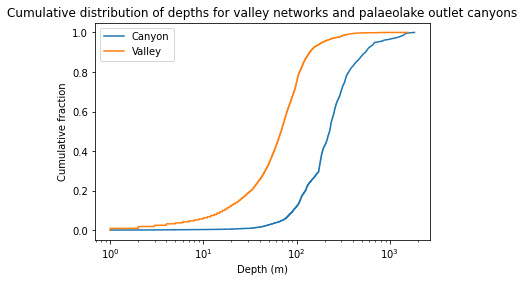

In [ ]:
# Create the cummulative distribution graph 

# Overall depth sum
c_sum = np.sum(canyon)
valley_sum = np.sum(valley)

# create the probability density function (pdf) 
# to then create the cumulative distribution function (cdf)
canyon_pdf = canyon/ c_sum
valley_pdf= valley / valley_sum
cdf_c = np.cumsum(canyon_pdf)
cdf_v = np.cumsum(valley_pdf)

# create the x axis
x_c = np.sort(canyon)
x_v = np.sort(valley)

# Plot
plt.semilogx(x_c, cdf_c, label="Canyon")
plt.semilogx(x_v, cdf_v, label="Valley")
plt.xlabel('Depth (m)')
plt.ylabel('Cumulative fraction')
plt.legend(loc="upper left")
plt.title("Cumulative distribution of depths for valley networks and palaeolake outlet canyons")


**Reflection Question:** What might be some physical consequences of having deep canyons in a valley network? (and how might this look different on Mars compared to Earth?) <br>

Deep canyons in a valley network lower the overall baselines for water. Thus, they completely drain the paleolakes that they are connected to. Also, these deep canyons could end up being a drainage source for the nearby rivers which are signifcantly less deep. Thus, when the fairly shallow rivers drain into a deep canyon, it creates a knickpoint where they join. On Earth knickpoints move up to the headwaters as more erosion happens; however, Mars is now dry thus it wouldn't be suprsing to see knickpoints lower down (not in the headwaters) marking Mars valley networks as fairly immature compared to Earth. 